# Objetivo: Desarrollo de funciones para procesar productos Sentinel-2 co snappy
# Fecha: 26/07/2024
# Autor: Gustavo V. Diaz

In [1]:
# Para manejo de raster


# Para abrir y bajar archivos en lista de bajada
import pandas as pd
import os
import sys
sys.path.append(r'../utils')
import mod_dloader as mdl

# Para manipular archivo bajado
import snappy
from snappy import Product
from snappy import ProductIO
from snappy import ProductUtils
from snappy import WKTReader
from snappy import HashMap
from snappy import GPF

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

/opt/venv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Lectura de df generado para seleccionar productos sentinel-2
path2df = r'/src/output/research_20240725T223256_Tratayen.xls'
df = pd.read_excel(path2df, sheet_name='resume_search')
display(df)
# Pude abrir el xls pero debo guardar la planilla con formato xls y no xlsx como lo había hecho.

,Unnamed: 0,Unnamed: 1,Unnamed: 2,cloudCover,Id,Name,shape,acq_date
0,MSIL2A,T19HET,N0509,14.980999,33a0f98c-5167-5a72-9fb9-0ed7fbb231bc,S2B_MSIL2A_20230107T141709_N0509_R010_T19HET_2...,"POLYGON ((-69.00021 -37.9475895719933, -69.000...",2023-01-07 14:17:09
1,NaN,NaN,N0509,1.562553,ea3043f6-abea-5cb3-ad34-608c33992e76,S2A_MSIL2A_20230112T141711_N0509_R010_T19HET_2...,"POLYGON ((-69.00021 -37.9475895719933, -69.000...",2023-01-12 14:17:11
2,NaN,NaN,N0509,0.000562,64994d5b-4b3f-5d57-bbf0-e3ef099338e7,S2A_MSIL2A_20230115T142711_N0509_R053_T19HET_2...,"POLYGON ((-68.2912 -37.9438257932026, -69.0002...",2023-01-15 14:27:11
3,NaN,NaN,N0509,1.742787,dad956c6-a9f9-521f-b5d9-bb01f969b777,S2B_MSIL2A_20230120T142709_N0509_R053_T19HET_2...,"POLYGON ((-68.287964 -37.9438086140647, -69.00...",2023-01-20 14:27:09
4,NaN,NaN,N0509,0.401804,10e5880c-bef8-54d1-8464-90ad7c24cef8,S2A_MSIL2A_20230122T141711_N0509_R010_T19HET_2...,"POLYGON ((-69.00021 -37.9475895719933, -69.000...",2023-01-22 14:17:11
5,NaN,NaN,N0509,0.001960,735dd08b-3710-5a9e-ac60-bbfdaa484afd,S2A_MSIL2A_20230125T142711_N0509_R053_T19HET_2...,"POLYGON ((-68.298065 -37.9438622103473, -69.00...",2023-01-25 14:27:11
6,NaN,NaN,N0509,0.001072,cc1aefa8-45f9-52fd-bdfe-92c20b083c46,S2B_MSIL2A_20230127T141709_N0509_R010_T19HET_2...,"POLYGON ((-69.0002276354548 -37.9475895719933,...",2023-01-27 14:17:09
7,NaN,NaN,N0509,0.005158,5f35ecac-f932-51d6-84f4-ea149c5514be,S2B_MSIL2A_20230130T142709_N0509_R053_T19HET_2...,"POLYGON ((-68.28497 -37.9437926006053, -69.000...",2023-01-30 14:27:09
8,NaN,NaN,N0509,0.002573,5bf9fff7-ca08-58b6-a99a-fdbe17e15998,S2A_MSIL2A_20230204T142711_N0509_R053_T19HET_2...,"POLYGON ((-68.30292 -37.9438879926409, -69.000...",2023-02-04 14:27:11
9,NaN,NaN,N0509,16.354923,3e2eaa5c-9a83-5a7d-94fc-00aea0bc41b2,S2B_MSIL2A_20230206T141709_N0509_R010_T19HET_2...,"POLYGON ((-69.00021 -37.9475895719933, -69.000...",2023-02-06 14:17:09


**Objetivo para dirigir la misión** \
**Misión**: procesar cada producto S2 con la geometría en la misma proyección que el producto S2\
**Objetivo**: Bajar un producto para leer la proyección del mismo y así hacer la transformación al objeto vectorial

In [3]:
# Id de ejemplo para obtener el tipo de proyección del producto
# Definiciones
user = 'gus838@gmail.com'
passw = 'Ul!RsPWTPuw3'
verbose = True
aux_key = 'access_token'
kc_token = 'KEYCLOAK_TOKEN'
prod_series = df.loc[0]
id_prod_series = prod_series.Id
name_prod_series = prod_series.Name
output_path = r'/src/output/'
str_token = mdl.get_keycloak(user, passw, verbose)
os.environ[kc_token] = str_token
# print(id_prod_series)

Visualización de variables en get_keycloak en módulo mod_dloader.py
{'client_id': 'cdse-public', 'username': 'gus838@gmail.com', 'password': 'Ul!RsPWTPuw3', 'grant_type': 'password'}


In [4]:
# Bajo el producto para examinarlo con snappy



for row in df.iterrows():
    prod_id = row[1]['Id']
    prod_name = row[1]['Name']
    str_token = mdl.get_keycloak(user, passw, verbose)
    os.environ[kc_token] = str_token
    print('Variables para generadas en cada iteración:')
    print(f'Id Producto: {prod_id}',f'Nombre producto: {prod_name}',f'user: {user}',f'Key_cloak: {str_token}', sep='\n')
    print(f'Id Producto: {prod_id}',f'\nNombre producto: {prod_name}',f'\nuser: {user}')
    print()
    file2verif = os.path.join(output_path,prod_name + '.zip')
    if os.path.isfile(file2verif):
        print(f'Archivo {file2verif} existente')
        pass
    else:
        print(f'Archivo {file2verif} NO existente, bajando')
        mdl.prod_downloader_2(prod_id, os.environ[kc_token], output_path, prod_name, verbose)
    # BREAK de debug, solo permite que se baje un solo producto (el primero de la lista)
    break
#     if verbose:
#         print("Token de variable 'str_token'", str_token, sep='\n')
#         print('Variable de producto a ingresar a función "Bajadora"', prod_name, prod_id, sep='\n')

Visualización de variables en get_keycloak en módulo mod_dloader.py
{'client_id': 'cdse-public', 'username': 'gus838@gmail.com', 'password': 'Ul!RsPWTPuw3', 'grant_type': 'password'}
Variables para generadas en cada iteración:
Id Producto: 33a0f98c-5167-5a72-9fb9-0ed7fbb231bc
Nombre producto: S2B_MSIL2A_20230107T141709_N0509_R010_T19HET_20230107T181706.SAFE
user: gus838@gmail.com
Key_cloak: eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJYVUh3VWZKaHVDVWo0X3k4ZF8xM0hxWXBYMFdwdDd2anhob2FPLUxzREZFIn0.eyJleHAiOjE3MjUyMjQyMjUsImlhdCI6MTcyNTIyMzYyNSwianRpIjoiODY5Y2MyOTYtYmI2Yy00OTNmLTgzMTMtZTJmYzQ1MDJiNWYxIiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS5kYXRhc3BhY2UuY29wZXJuaWN1cy5ldS9hdXRoL3JlYWxtcy9DRFNFIiwiYXVkIjpbIkNMT1VERkVSUk9fUFVCTElDIiwiYWNjb3VudCJdLCJzdWIiOiI5NjNiNzVlZC01YWUyLTQzMWQtOGU3Yy0zZDNjYTc4ZDYxNDkiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJjZHNlLXB1YmxpYyIsInNlc3Npb25fc3RhdGUiOiI4ZjgwNzAyZi01MThmLTQxMmYtOGVkMi00YTM3MzgxZjI0Y2QiLCJhbGxvd2VkLW9yaWdpbnMiOlsiaHR0cHM6Ly9sb2NhbGhvc3Q6NDIwMCIsIioiLCJodH

In [5]:
# Manejo de producto sentinel para leer proyección de producto
product = ProductIO.readProduct(file2verif)

# Procesamiento de datos
width = product.getSceneRasterWidth()
print(f"Ancho: {width} px\n")
height = product.getSceneRasterHeight()
print(f"Alto: {height} px\n")
prod_name = product.getName()
print(f"Nombre: {prod_name}\n")
band_names = product.getBandNames()
# print(f"Nombre de bandas: {band_names}")
# print("Band names: {}".format(", ".join(band_names)))
str_band_n = ", ".join(band_names).split(", ")
print(f"Cantidad de bandas: {len(str_band_n)}\n")
# display(len(str_band_n), str_band_n)
crs_raster = product.getSceneCRS()
geocod_raster = product.getSceneGeoCoding()
# print("Muestras de proyección de producto", type(crs_raster), crs_raster, type(geocod_raster), geocod_raster, sep = '\n')

Ancho: 10980 px

Alto: 10980 px

Nombre: S2B_MSIL2A_20230107T141709_N0509_R010_T19HET_20230107T181706

Cantidad de bandas: 158



In [6]:
# from osgeo import gdal -> No funciona, no encuentra el módulo _gdal
# !python3 test_script.py -> No funciona, ValueError: filedescriptor out of range in select()
# Intento por la vía del scripting en python llamando a un script ejecutable
# Ya logré obtener geometría de kml y reproyectar coordenadas de geometría a proyección que leí de producto Sentinel
# Ahora voy por levantar el archivo que tiene el WKT reproyectado y cortar el producto para verlo en pantalla.

## Archivo que contiene wkt reproyectado
wkt_path = r'./aux_files/wkt_reproj_file.txt'
## Archivo que contiene wkt original
wkt_orig_path = r'./aux_files/wkt_file.txt'

with open(wkt_path, 'r') as f:
    wkt_reproj = f.readline()

with open(wkt_orig_path, 'r') as f:
    wkt_orig = f.readline()

print("Lectura de archivo contenedor de WKT reproyectado y orignal", wkt_reproj, wkt_orig, sep='\n')

Lectura de archivo contenedor de WKT reproyectado y orignal
POLYGON ((535131.363187576 5745226.53293116 0,536220.080111037 5743114.29916847 0,540929.824764003 5743516.6664413 0,542194.185237653 5744614.69785195 0,539682.890919328 5747574.41152683 0,535980.320736327 5747240.66225041 0,535131.363187576 5745226.53293116 0))
POLYGON ((-68.5974389987327 -38.4405494769166 0,-68.5848549279354 -38.4595413423777 0,-68.5308981309906 -38.4557115385539 0,-68.5164736486453 -38.4457572914763 0,-68.5454183508289 -38.4191997221209 0,-68.5878144507599 -38.4223643154619 0,-68.5974389987327 -38.4405494769166 0))


In [7]:
## Lectura de WKT con snappy
geometry = WKTReader().read(wkt_reproj)
geometry_4326 = WKTReader().read(wkt_orig)
print(geometry)
print(geometry_4326)
# Aparentemente leyó correctemente la geometría definida en WKT

POLYGON ((535131.363187576 5745226.53293116, 536220.080111037 5743114.29916847, 540929.824764003 5743516.6664413, 542194.185237653 5744614.69785195, 539682.890919328 5747574.41152683, 535980.320736327 5747240.66225041, 535131.363187576 5745226.53293116))
POLYGON ((-68.5974389987327 -38.4405494769166, -68.5848549279354 -38.4595413423777, -68.5308981309906 -38.4557115385539, -68.5164736486453 -38.4457572914763, -68.5454183508289 -38.4191997221209, -68.5878144507599 -38.4223643154619, -68.5974389987327 -38.4405494769166))


In [8]:
# Objetivo 2 del día Cortar producto por geometría
SubsetOp = snappy.jpy.get_type('org.esa.snap.core.gpf.common.SubsetOp')
geometry = WKTReader().read(wkt_reproj)
HashMap = snappy.jpy.get_type('java.util.HashMap')
GPF.getDefaultInstance().getOperatorSpiRegistry().loadOperatorSpis()
parameters = HashMap()
parameters.put('copyMetadata', True)
parameters.put('geoRegion', geometry_4326)
product_subset = GPF.createProduct('Subset', parameters, product)

In [9]:
## Verificicación de creación de subset
width = product_subset.getSceneRasterWidth()
print("Width: {}px".format(width))
height = product_subset.getSceneRasterHeight()
print("Height: {} px".format(height))
band_names = product_subset.getBandNames()
band_list = ", ".join(band_names).split(', ')
display(band_list)
# print("Band names: {}".format(", ".join(band_names)))
band = product_subset.getBand(band_names[0])
print(band.getRasterSize())

Width: 706px
Height: 446 px


['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B9',
 'B11',
 'B12',
 'quality_aot',
 'quality_wvp',
 'quality_cloud_confidence',
 'quality_snow_confidence',
 'quality_scene_classification',
 'B_detector_footprint_B1',
 'B_detector_footprint_B2',
 'B_detector_footprint_B3',
 'B_detector_footprint_B4',
 'B_detector_footprint_B5',
 'B_detector_footprint_B6',
 'B_detector_footprint_B7',
 'B_detector_footprint_B8',
 'B_detector_footprint_B8A',
 'B_detector_footprint_B9',
 'B_detector_footprint_B11',
 'B_detector_footprint_B12',
 'B_ancillary_lost_B1',
 'B_ancillary_degraded_B1',
 'B_msi_lost_B1',
 'B_msi_degraded_B1',
 'B_defective_B1',
 'B_nodata_B1',
 'B_partially_corrected_crosstalk_B1',
 'B_saturated_l1a_B1',
 'B_ancillary_lost_B2',
 'B_ancillary_degraded_B2',
 'B_msi_lost_B2',
 'B_msi_degraded_B2',
 'B_defective_B2',
 'B_nodata_B2',
 'B_partially_corrected_crosstalk_B2',
 'B_saturated_l1a_B2',
 'B_ancillary_lost_B3',
 'B_ancillary_degraded_B3',
 'B_msi_lost_B3',
 'B_

java.awt.Dimension[width=353,height=223]


In [10]:
 def plotBand(product,band,vmin,vmax):
    band=product.getBand(band)
    w=band.getRasterWidth()
    h=band.getRasterHeight()
    print(w,h)
    band_data=np.zeros(w*h,np.float32)
    band.readPixels(0,0,w,h,band_data)
    band_data.shape=h,w
    width=12
    height=12
    plt.figure(figsize=(width,height))
    imgplot=plt.imshow(band_data,cmap=plt.cm.binary,vmin=vmin,vmax=vmax)

    return imgplot

706 446


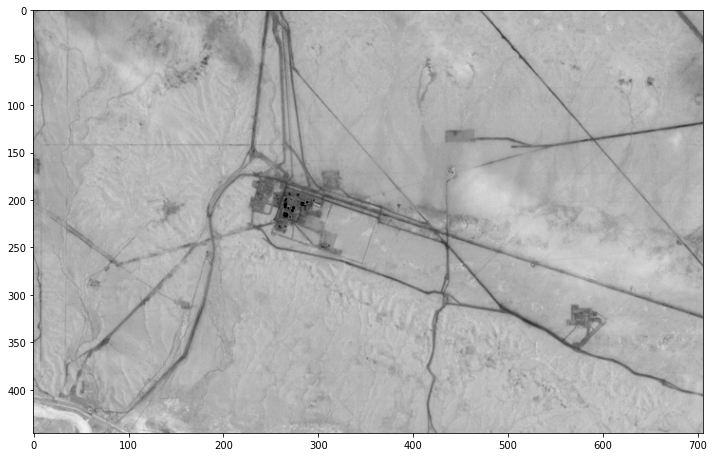

In [13]:
plotBand(product_subset, 'B2',0, 0.3)